In [1]:
import h5py
import matplotlib.pyplot as plt
import pvlib
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates
import matplotlib as mpl # for latex r'$...$'<


### Measured

In [2]:
data_avg = pd.read_csv("data/OLFPR_avg_h.dat",sep=",",low_memory=False,header = 1)
data_1hz = pd.read_csv("data/OLFPR_OneSec.dat",sep=",",low_memory=False,header = 1)

In [3]:
data_1hz

,TIMESTAMP,RECORD,PTemp_C,thermoGHI,PhotoGHI,Temp,RHum,WS_ms,WS_ms_S_WVT,WindDir_D1_WVT,WindDir_SD1_WVT
0,TS,RN,Deg C,W/m^2,W/m2,Deg C,%,meters/second,meters/second,Deg,Deg
1,NaN,NaN,Smp,Smp,Smp,Smp,Smp,Smp,WVc,WVc,WVc
2,2022-08-29 10:50:01,3069,24.31,294.8,307.4,21.27,65.18,1.006,1.006,222.5,0
3,2022-08-29 10:50:02,3070,24.31,294.7,307.3,21.27,65.18,1.006,1.006,222.5,0.02
4,2022-08-29 10:50:03,3071,24.31,294.5,307.2,21.27,65.2,1.006,1.006,222.5,0
...,...,...,...,...,...,...,...,...,...,...,...
1202695,2022-09-12 08:54:54,1205762,21.27,312.7,328.3,18.96,77.13,2.012,2.012,46.24,0
1202696,2022-09-12 08:54:55,1205763,21.27,312.7,328.3,18.96,77.16,1.006,1.006,56.66,0
1202697,2022-09-12 08:54:56,1205764,21.28,312.5,328.2,18.95,77.19,1.006,1.006,57.85,0
1202698,2022-09-12 08:54:57,1205765,21.28,312.5,328.1,18.95,77.19,2.012,2.012,57.81,0


In [4]:
df = pd.DataFrame(data_1hz)
df = df.drop([0, 1])
df

,TIMESTAMP,RECORD,PTemp_C,thermoGHI,PhotoGHI,Temp,RHum,WS_ms,WS_ms_S_WVT,WindDir_D1_WVT,WindDir_SD1_WVT
2,2022-08-29 10:50:01,3069,24.31,294.8,307.4,21.27,65.18,1.006,1.006,222.5,0
3,2022-08-29 10:50:02,3070,24.31,294.7,307.3,21.27,65.18,1.006,1.006,222.5,0.02
4,2022-08-29 10:50:03,3071,24.31,294.5,307.2,21.27,65.2,1.006,1.006,222.5,0
5,2022-08-29 10:50:04,3072,24.31,294.4,307.1,21.27,65.2,1.006,1.006,222.5,0
6,2022-08-29 10:50:05,3073,24.31,294.3,307,21.27,65.23,1.006,1.006,222.5,0
...,...,...,...,...,...,...,...,...,...,...,...
1202695,2022-09-12 08:54:54,1205762,21.27,312.7,328.3,18.96,77.13,2.012,2.012,46.24,0
1202696,2022-09-12 08:54:55,1205763,21.27,312.7,328.3,18.96,77.16,1.006,1.006,56.66,0
1202697,2022-09-12 08:54:56,1205764,21.28,312.5,328.2,18.95,77.19,1.006,1.006,57.85,0
1202698,2022-09-12 08:54:57,1205765,21.28,312.5,328.1,18.95,77.19,2.012,2.012,57.81,0


In [5]:
format = '%Y-%m-%d %H:%M:%S'
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'],format=format)
df = df.set_index(pd.DatetimeIndex(df['TIMESTAMP']))

In [6]:
df = df.drop(['TIMESTAMP','PTemp_C','RECORD','WS_ms_S_WVT','WindDir_SD1_WVT'], axis=1)
df.rename(columns={'TIMESTAMP': 'Datetime',"Temp": "T_amb","thermoGHI": "GHI_th_mes","PhotoGHI":"GHI_ph_mes","RHum":"R_hum","WS_ms":"W_speed","WindDir_D1_WVT":"W_dir"},inplace=True)
df.rename_axis('Datetime',inplace=True)
#df = df.tz_localize(tz='Europe/Berlin') # Timezone Shift from UTC->+2 MESZ in Pandas (necessary to set Matplotlib also to MESZ to plot correctly!)
df

,GHI_th_mes,GHI_ph_mes,T_amb,R_hum,W_speed,W_dir
Datetime,,,,,,
2022-08-29 10:50:01,294.8,307.4,21.27,65.18,1.006,222.5
2022-08-29 10:50:02,294.7,307.3,21.27,65.18,1.006,222.5
2022-08-29 10:50:03,294.5,307.2,21.27,65.2,1.006,222.5
2022-08-29 10:50:04,294.4,307.1,21.27,65.2,1.006,222.5
2022-08-29 10:50:05,294.3,307,21.27,65.23,1.006,222.5
...,...,...,...,...,...,...
2022-09-12 08:54:54,312.7,328.3,18.96,77.13,2.012,46.24
2022-09-12 08:54:55,312.7,328.3,18.96,77.16,1.006,56.66
2022-09-12 08:54:56,312.5,328.2,18.95,77.19,1.006,57.85


In [7]:
df = df['2022-08-29 10:50:01':'2022-09-12 07:05:20'] # Select Timeseries from UTC POV (started data collection at 10UTC+2=12h
df = df.fillna(0)

In [8]:
df_safe = df

In [9]:
df = df_safe

In [10]:
GHI_th_mes = df['GHI_th_mes'].astype(np.float64)
GHI_ph_mes = df['GHI_ph_mes'].astype(np.float64)
T_amb = df['T_amb'].astype(np.float64)
R_hum = df['R_hum'].astype(np.float64)
W_speed = df['W_speed'].astype(np.float64)
W_dir = (df['W_dir'].astype(np.float64) -45) % 360

### OLWIN

In [11]:
dates = ['20220829','20220830','20220831','20220901','20220902','20220903','20220904','20220905','20220906','20220907','20220908','20220909','20220910','20220911','20220912']
df2 = []

for date in dates:
    filename='C:/Users/Andre/Desktop/#4/data/OLWINCarinaAndre/{d}_1s.dat'.format(d=date)
    data = pd.read_csv(filename,sep=",",low_memory=False,header = 1)
    df2.append(data)

In [12]:
df2 = pd.concat(df2)
df2 = pd.DataFrame(df2)
df2.drop(index=[0,1],inplace=True)
df2

,TIMESTAMP,RECORD,GHI_1,DHI_1,DNI_1,GHI_SI_1,DHI_2,DNI_2
2,2022-08-29 00:00:00,55234433,2.111,0.02,0.044,-0.002,3,0
3,2022-08-29 00:00:01,55234434,1.472,0.047,0.065,-0.004,4,0
4,2022-08-29 00:00:02,55234435,1.626,0.031,0.08,-0.003,65535,0
5,2022-08-29 00:00:03,55234436,1.769,0.022,0.041,-0.002,3,0
6,2022-08-29 00:00:04,55234437,1.868,0.01,0.067,-0.003,19,0
...,...,...,...,...,...,...,...,...
86397,2022-09-12 23:59:55,56530428,2.232,0.589,-0.211,0.001,2,0
86398,2022-09-12 23:59:56,56530429,2.251,0.626,-0.223,-0.002,2,0
86399,2022-09-12 23:59:57,56530430,2.251,0.644,-0.204,-0.004,4,0
86400,2022-09-12 23:59:58,56530431,2.286,0.671,-0.215,-0.002,9,0


In [13]:
format = '%Y-%m-%d %H:%M:%S'
df2['TIMESTAMP'] = pd.to_datetime(df2['TIMESTAMP'],format=format)
df2 = df2.set_index(pd.DatetimeIndex(df2['TIMESTAMP']))

df2 = df2.drop(['TIMESTAMP','RECORD','DHI_2','DNI_2'], axis=1)
df2.rename(columns={'TIMESTAMP': 'Datetime','GHI_1':'GHI_th_OLWIN','DHI_1':'DHI_th_OLWIN','DNI_1':'DNI_th_OLWIN','GHI_SI_1':'GHI_ph_OLWIN'},inplace=True)
df2.rename_axis('Datetime',inplace=True)
#df2 = df2.tz_localize(tz='Europe/Berlin')
df2

,GHI_th_OLWIN,DHI_th_OLWIN,DNI_th_OLWIN,GHI_ph_OLWIN
Datetime,,,,
2022-08-29 00:00:00,2.111,0.02,0.044,-0.002
2022-08-29 00:00:01,1.472,0.047,0.065,-0.004
2022-08-29 00:00:02,1.626,0.031,0.08,-0.003
2022-08-29 00:00:03,1.769,0.022,0.041,-0.002
2022-08-29 00:00:04,1.868,0.01,0.067,-0.003
...,...,...,...,...
2022-09-12 23:59:55,2.232,0.589,-0.211,0.001
2022-09-12 23:59:56,2.251,0.626,-0.223,-0.002
2022-09-12 23:59:57,2.251,0.644,-0.204,-0.004


In [14]:
df2 = df2['2022-08-29 10:50:01':'2022-09-12 07:05:20']
df2 = df2.fillna(0)

df2

,GHI_th_OLWIN,DHI_th_OLWIN,DNI_th_OLWIN,GHI_ph_OLWIN
Datetime,,,,
2022-08-29 10:50:01,292.4,277.2,4.637,294
2022-08-29 10:50:02,292.3,277.1,4.605,293.8
2022-08-29 10:50:03,292.1,276.9,4.606,293.6
2022-08-29 10:50:04,292,276.8,4.608,293.5
2022-08-29 10:50:05,291.9,276.6,4.621,293.3
...,...,...,...,...
2022-09-12 07:05:16,316.1,184.3,403.1,328.1
2022-09-12 07:05:17,316,184.4,402.5,327.9
2022-09-12 07:05:18,316,184.5,402,327.9


In [15]:
df2_safe = df2

In [16]:
df2 = df2_safe

In [17]:
GHI_th_OLWIN = df2['GHI_th_OLWIN'].astype(np.float64)
DHI_th_OLWIN = df2['DHI_th_OLWIN'].astype(np.float64)
DNI_th_OLWIN = df2['DNI_th_OLWIN'].astype(np.float64)
GHI_ph_OLWIN = df2['GHI_ph_OLWIN'].astype(np.float64)
GHI_th_OLWIN.dtype

dtype('float64')

## 1. Frage Vgl.: GHI mes vs. OLWIN

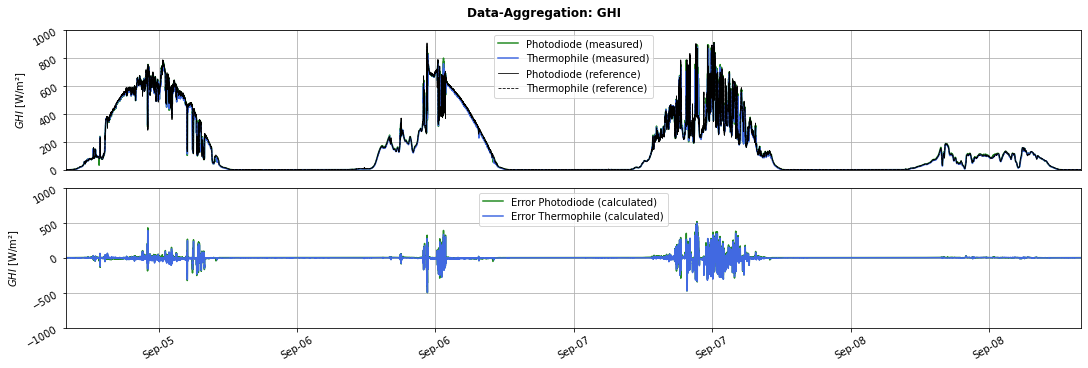

In [18]:
fig, axs = plt.subplots(2,figsize=(15,5), sharex=True, constrained_layout=True)
fig.suptitle('Data-Aggregation: GHI',fontweight='bold')
axs[0].tick_params(labelrotation=30)
axs[1].tick_params(labelrotation=30)
axs[0].grid()
axs[1].grid()
# Overview Plot
axs[0].plot(GHI_ph_mes,label='Photodiode (measured)',color='forestgreen')
axs[0].plot(GHI_th_mes,label='Thermophile (measured)',color='royalblue')
axs[0].plot(GHI_ph_OLWIN,label='Photodiode (reference)',color='black',linewidth=0.8)
axs[0].plot(GHI_th_OLWIN,label='Thermophile (reference)',color='black',linewidth=0.8, linestyle='--')
# Error Plot
axs[1].plot(GHI_ph_mes- GHI_ph_OLWIN,label='Error Photodiode (calculated)',color='forestgreen')
axs[1].plot(GHI_th_mes - GHI_th_OLWIN,label='Error Thermophile (calculated)',color='royalblue')

axs[0].tick_params(axis='x', which='both',bottom=False) # turn off major & minor ticks on the bottom
axs[0].legend(loc="upper center")
axs[1].legend(loc="upper center")
#plt.plot(DHI_th_OLWIN,label='DHI OLWIN (referenz)',color='black',linewidth=0.5)
#plt.xticks(rotation=30)
axs[0].set_xlim(np.datetime64('2022-09-05T04:00:00'), np.datetime64('2022-09-08T20:00:00'))
axs[1].set_xlim(np.datetime64('2022-09-05T04:00:00'), np.datetime64('2022-09-08T20:00:00'))
axs[0].set_ylim(0,1000)
axs[1].set_ylim(-1000,1000)
dtFmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(dtFmt)
axs[0].set_ylabel(r'$GHI~\mathrm{[W/m²]}$')
axs[1].set_ylabel(r'$GHI~\mathrm{[W/m²]}$')
plt.savefig('new_1_GHI.png')
plt.show()

#### 1.1 Error Metrics

In [19]:
def error_metrics(data: float, ref: float, name: str):
    data_err = np.array(data)
    data_err = data - ref
    data_MBE = np.nanmean(data_err)
    data_RMSE = np.sqrt(np.nanmean(data_err**2))
    data_MAE = np.nanmean(np.abs(data_err))
    print(name,':')
    print('MBE={:.2f}\nRMSE={:.2f}\nMAE={:.2f}'.format(data_MBE,data_RMSE,data_MAE))

error_metrics(GHI_ph_mes,GHI_ph_OLWIN, 'GHI_ph')
error_metrics(GHI_th_mes,GHI_th_OLWIN, 'GHI_th')
error_metrics(GHI_ph_mes,GHI_th_mes, 'GHI_th_ph')


GHI_ph :
MBE=-1.18
RMSE=59.80
MAE=14.64
GHI_th :
MBE=-4.64
RMSE=57.21
MAE=15.68
GHI_th_ph :
MBE=2.46
RMSE=12.80
MAE=4.74


#### grafike nDHI DNI vgl?

## 2. Decomposition Modelling

In [20]:
### Variablen setzen
lat = 53.1521
lon = 8.1656

solpos = pvlib.solarposition.get_solarposition(df.index, lat, lon)
SZA = solpos['apparent_zenith']

AM_rel = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
AM_abs = pvlib.atmosphere.get_absolute_airmass(AM_rel)

# Tilt
PV_tilt = 54.7 # (Winkelmesser)
PV_azimuth = 180 # urspr 133 +135 geo

# extraterrestrial radiation
dni_extra = pvlib.irradiance.get_extra_radiation(df.index) 

C:\Users\Andre\anaconda3\lib\site-packages\pvlib\solarposition.py:365: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  unixtime = np.array(time.astype(np.int64)/10**9)


## ERBS model

In [21]:
decomp_erbs_th_mes = pvlib.irradiance.erbs(GHI_th_mes, solpos['apparent_zenith'], df.index ,min_cos_zenith=0.999)
decomp_erbs_th_mes.keys()

DNI_th_erbs = decomp_erbs_th_mes['dni']
DHI_th_erbs = decomp_erbs_th_mes['dhi']

## Dirint model

In [22]:
decomp_dirint_DNI_th_mes = pvlib.irradiance.dirint(GHI_th_mes, SZA, df.index, pressure=101145.0, use_delta_kt_prime=True, 
                                                   temp_dew=None, min_cos_zenith=0.065, max_zenith=87)
DNI_th_dirint = decomp_dirint_DNI_th_mes

# Berechne DHI aus DNI Dirint mittels Closing Equation
DHI_th_dirint = GHI_th_mes - (DNI_th_dirint * np.cos(SZA*(np.pi/180)))

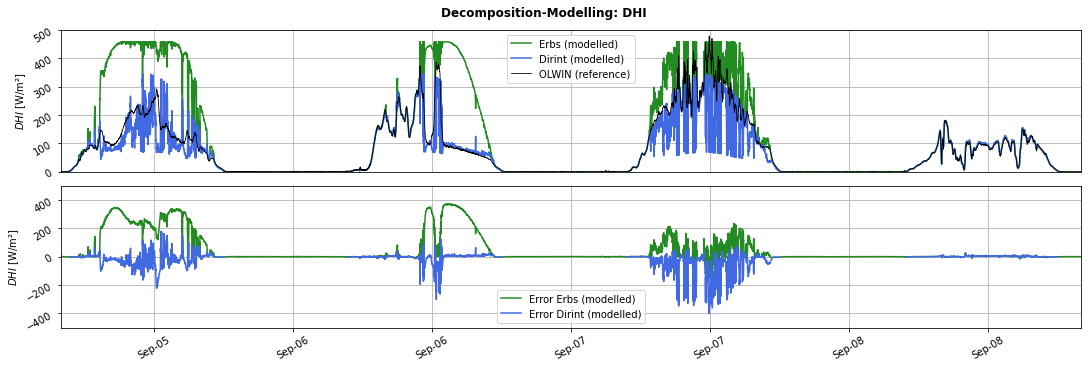

In [23]:
fig, axs = plt.subplots(2,figsize=(15,5), sharex=True, constrained_layout=True)
fig.suptitle('Decomposition-Modelling: DHI',fontweight='bold')
axs[0].tick_params(labelrotation=30)
axs[1].tick_params(labelrotation=30)
axs[0].grid()
axs[1].grid()
# Overview Plot
axs[0].plot(DHI_th_erbs,label='Erbs (modelled)',color='forestgreen')
axs[0].plot(DHI_th_dirint,label='Dirint (modelled)',color='royalblue')
axs[0].plot(DHI_th_OLWIN,label='OLWIN (reference)',color='black',linewidth=0.8)
# Error Plot
axs[1].plot(DHI_th_erbs - DHI_th_OLWIN,label='Error Erbs (modelled)',color='forestgreen')
axs[1].plot(DHI_th_dirint - DHI_th_OLWIN,label='Error Dirint (modelled)',color='royalblue')

axs[0].tick_params(axis='x', which='both',bottom=False) # turn off major & minor ticks on the bottom
axs[0].legend(loc="upper center")
axs[1].legend(loc="lower center")

axs[0].set_xlim(np.datetime64('2022-09-05T04:00:00'), np.datetime64('2022-09-08T20:00:00'))
axs[1].set_xlim(np.datetime64('2022-09-05T04:00:00'), np.datetime64('2022-09-08T20:00:00'))
axs[0].set_ylim(0,500)
axs[1].set_ylim(-500,500)
dtFmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(dtFmt) 
axs[0].set_ylabel(r'$DHI~\mathrm{[W/m²]}$')
axs[1].set_ylabel(r'$DHI~\mathrm{[W/m²]}$')
#plt.savefig('new_2_decomp_DHI.png')
plt.show()

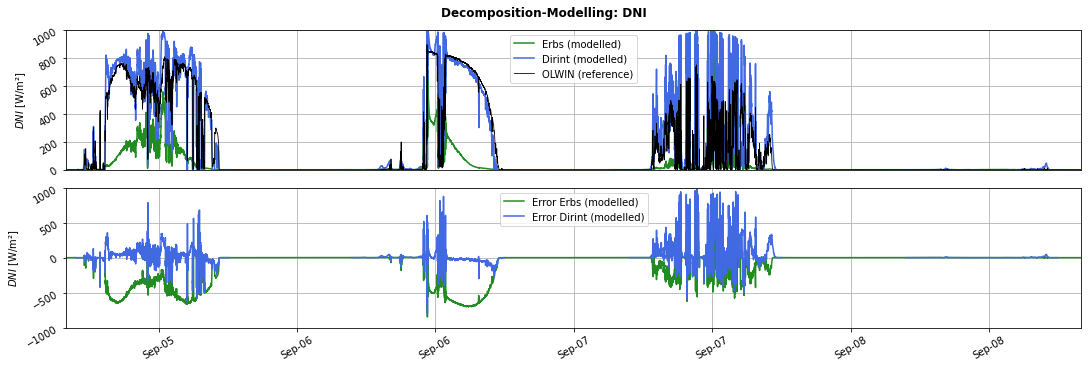

In [24]:
fig, axs = plt.subplots(2,figsize=(15,5), sharex=True, constrained_layout=True)
fig.suptitle('Decomposition-Modelling: DNI',fontweight='bold')
axs[0].tick_params(labelrotation=30)
axs[1].tick_params(labelrotation=30)
axs[0].grid()
axs[1].grid()
# Overview Plot
axs[0].plot(DNI_th_erbs,label='Erbs (modelled)',color='forestgreen')
axs[0].plot(DNI_th_dirint,label='Dirint (modelled)',color='royalblue')
axs[0].plot(DNI_th_OLWIN,label='OLWIN (reference)',color='black',linewidth=0.8)
# Error Plot
axs[1].plot(DNI_th_erbs - DNI_th_OLWIN,label='Error Erbs (modelled)',color='forestgreen')
axs[1].plot(DNI_th_dirint - DNI_th_OLWIN,label='Error Dirint (modelled)',color='royalblue')

axs[0].tick_params(axis='x', which='both',bottom=False) # turn off major & minor ticks on the bottom
axs[0].legend(loc="upper center")
axs[1].legend(loc="upper center")

axs[0].set_xlim(np.datetime64('2022-09-05T04:00:00'), np.datetime64('2022-09-08T20:00:00'))
axs[1].set_xlim(np.datetime64('2022-09-05T04:00:00'), np.datetime64('2022-09-08T20:00:00'))
axs[0].set_ylim(0,1000)
axs[1].set_ylim(-1000,1000)
dtFmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(dtFmt) 
axs[0].set_ylabel(r'$DNI~\mathrm{[W/m²]}$')
axs[1].set_ylabel(r'$DNI~\mathrm{[W/m²]}$')
#plt.savefig('new_2_decomp_DNI.png')
plt.show()

#### 2.1 Error Metrics

In [25]:
error_metrics(DNI_th_erbs, DNI_th_OLWIN, 'DNI erbs')
error_metrics(DNI_th_dirint, DNI_th_OLWIN, 'DNI dirint')
error_metrics(DHI_th_erbs, DHI_th_OLWIN, 'DHI erbs')
error_metrics(DHI_th_dirint, DHI_th_OLWIN, 'DNI dirint')

DNI erbs :
MBE=-140.41
RMSE=283.94
MAE=148.04
DNI dirint :
MBE=30.71
RMSE=170.87
MAE=83.92
DHI erbs :
MBE=67.45
RMSE=138.82
MAE=69.43
DNI dirint :
MBE=-17.02
RMSE=49.07
MAE=26.92


## 3.Transposition Modelling

In [26]:
GTI_klucher = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, solpos['apparent_zenith'], solpos['azimuth'], DNI_th_dirint, GHI_th_mes, DHI_th_dirint, model='klucher',dni_extra=dni_extra)
GTI_klucher.head()

,poa_global,poa_direct,poa_diffuse,poa_sky_diffuse,poa_ground_diffuse
Datetime,,,,,
2022-08-29 10:50:01,264.129469,18.220808,245.908661,230.352715,15.555947
2022-08-29 10:50:02,264.023124,18.194925,245.828199,230.277529,15.550670
2022-08-29 10:50:03,263.811023,18.143819,245.667204,230.127087,15.540116
2022-08-29 10:50:04,263.704753,18.118029,245.586724,230.051884,15.534839
2022-08-29 10:50:05,263.598508,18.092270,245.506238,229.976675,15.529563


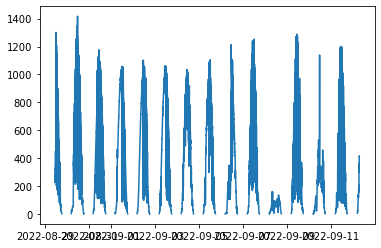

In [27]:
GTI_th_klucher_global = GTI_klucher['poa_global']
GTI_th_klucher_direct = GTI_klucher['poa_direct']
GTI_th_klucher_diffuse = GTI_klucher['poa_diffuse']

plt.plot(GTI_klucher['poa_global'])

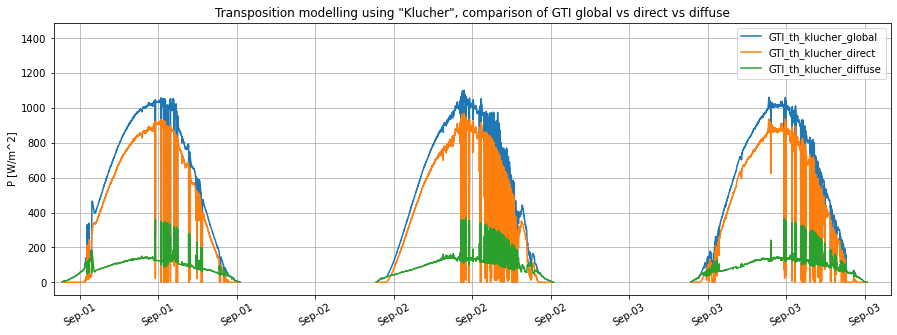

In [28]:
plt.figure(figsize=(15,5))
plt.title('Transposition modelling using "Klucher", comparison of GTI global vs direct vs diffuse')
plt.plot(GTI_th_klucher_global,label='GTI_th_klucher_global')
plt.plot(GTI_th_klucher_direct,label='GTI_th_klucher_direct')
plt.plot(GTI_th_klucher_diffuse,label='GTI_th_klucher_diffuse')
plt.xticks(rotation=30)
plt.grid()
plt.legend()
plt.xlim(np.datetime64('2022-09-01T04:00:00'), np.datetime64('2022-09-03T20:00:00'))
dtFmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(dtFmt) 
plt.ylabel('P [W/m^2]')
#plt.savefig('3_GTI_klucher.png')
plt.show()

## 4. Modell losses

In [29]:
## set necessary parameters
aoi = pvlib.irradiance.aoi(PV_tilt, PV_azimuth, solpos['apparent_zenith'], solpos['azimuth'])
#cell_temp = pvlib.temperature.sapm_cell(GTI_th_klucher_global, T_amb, W_speed, -3.47, -0.0594, 3, irrad_ref=1000.0)
# load sam data from 'https://github.com/NREL/SAM/blob/develop/deploy/libraries/Sandia%20Modules.csv' in dict (load does not work unfortunately)
module = {'Area': 1.26,'Material': 'c-Si','Cells in Series': 72,'Parallel Strings': 1,
          'Isco': 5.4,'Voco': 44,'Impo': 4.9,'Vmpo': 35.7,'Aisc': 0.00065,'Aimp': -0.0002,
          'C0':0.996,'C1': 0.004,'C2':0.4064,'C3': -3.982,'C4':0.991,'C5': 0.009,'C6':1.097,'C7':-0.097,
          'Bvoco': -0.16,'Mbvoc': 0,'Bvmpo': -0.164,'Mbvmp': 0,'N':1.24,
          'A0':0.9439,'A1': 0.052256,'A2': -0.011388,'A3': 0.00086866,'A4':-0.000022491,
          'B0':1,'B1':-0.002438,'B2':0.0003103,'B3':-0.00001246,'B4':2.11E-07,'B5':-1.36E-09,
          'dT':3,'FD': 1,'a': -3.49,'b': -0.087,
          'IXO': 5.33,'IXXO': 3.46}

In [30]:
GTI_th_klucher_eff = pvlib.pvsystem.sapm_effective_irradiance(GTI_th_klucher_direct, GTI_th_klucher_diffuse, AM_abs, aoi, module)

#### Load measured GTI from UNIPV

In [31]:
df3 = pd.read_csv("data/UNIPV.dat",sep=",",low_memory=False,header = 1)
df3

,TIMESTAMP,RECORD,Fluxes_Wm2,mpp(1),mpp(2),Temp(1),Temp(2),Temp(3)
0,TS,RN,NaN,mV,mV,degC,degC,degC
1,NaN,NaN,Smp,Smp,Smp,Smp,Smp,Smp
2,2022-08-27 19:54:07,3132510,-3.797,0,0.003,12.81,13.45,18.58
3,2022-08-27 19:54:08,3132511,-3.797,0,0.003,12.89,13.22,18.62
4,2022-08-27 19:54:09,3132512,-3.797,0.014,0.003,12.81,13.26,18.62
...,...,...,...,...,...,...,...,...
1343480,2022-09-12 09:05:22,4475988,237.5,28.96,1.025,24.51,24.39,28.54
1343481,2022-09-12 09:05:23,4475989,237.5,28.96,1.028,24.79,24.55,28.5
1343482,2022-09-12 09:05:24,4475990,237.5,28.96,1.031,24.51,24.39,28.46
1343483,2022-09-12 09:05:25,4475991,237.5,28.96,1.031,24.67,24.51,28.5


In [32]:
df3 = pd.DataFrame(df3)
df3 = df3.drop([0, 1])
format = '%Y-%m-%d %H:%M:%S'
df3['TIMESTAMP'] = pd.to_datetime(df3['TIMESTAMP'],format=format)
df3 = df3.set_index(pd.DatetimeIndex(df3['TIMESTAMP']))
df3 = df3.drop(['TIMESTAMP','RECORD'], axis=1)
df3.rename(columns={'Fluxes_Wm2': 'GTI_eff_unipv'},inplace=True)
df3.rename_axis('Datetime',inplace=True)

In [33]:
df3 = df3['2022-08-29 10:50:01':'2022-09-12 07:05:17']
df3 = df3.fillna(0)
df3

,GTI_eff_unipv,mpp(1),mpp(2),Temp(1),Temp(2),Temp(3)
Datetime,,,,,,
2022-08-29 10:50:01,210.1,28.96,0.897,23.85,24.1,30.51
2022-08-29 10:50:02,210.1,28.93,0.897,24.01,24.38,30.51
2022-08-29 10:50:03,210.1,28.96,0.897,23.77,24.26,30.55
2022-08-29 10:50:04,210.1,28.93,0.897,23.45,24.45,30.51
2022-08-29 10:50:05,210.1,28.91,0.897,23.25,24.18,30.55
...,...,...,...,...,...,...
2022-09-12 07:05:13,320.5,30.38,1.218,18.57,19.34,23.05
2022-09-12 07:05:14,319.7,30.35,1.218,18.45,19.3,23.13
2022-09-12 07:05:15,319.7,30.35,1.216,18.49,18.86,23.08


In [34]:
df3_safe = df3

In [35]:
df3 = df3_safe

In [36]:
GTI_eff_unipv = df3['GTI_eff_unipv'].astype(np.float64)

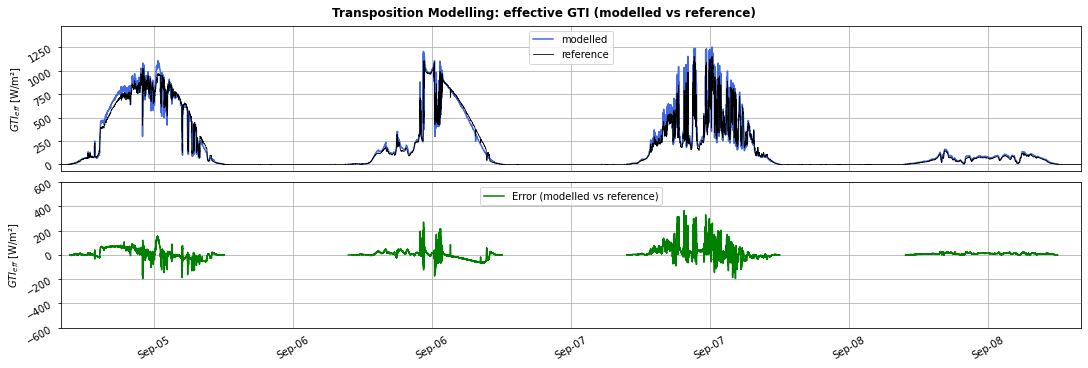

In [37]:
fig, axs = plt.subplots(2,figsize=(15,5), sharex=True, constrained_layout=True)
fig.suptitle('Transposition Modelling: effective GTI (modelled vs reference)',fontweight='bold')
axs[0].tick_params(labelrotation=30)
axs[1].tick_params(labelrotation=30)

axs[0].grid()
axs[1].grid()

# Overview Plot
axs[0].plot(GTI_th_klucher_eff,label='modelled',color='royalblue')
axs[0].plot(GTI_eff_unipv,label='reference',color='black',linewidth=0.8)
# Error Plot
axs[1].plot(GTI_th_klucher_eff - GTI_eff_unipv,label='Error (modelled vs reference)',color='green')

axs[0].tick_params(axis='x', which='both',bottom=False) # turn off major & minor ticks on the bottom
axs[1].tick_params(axis='x', which='both',bottom=False) # turn off major & minor ticks on the bottom
axs[0].legend(loc="upper center")
axs[1].legend(loc="upper center")

axs[0].set_xlim(np.datetime64('2022-09-05T04:00:00'), np.datetime64('2022-09-08T20:00:00'))
axs[1].set_xlim(np.datetime64('2022-09-05T04:00:00'), np.datetime64('2022-09-08T20:00:00'))
axs[1].set_ylim(-600,600)

dtFmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(dtFmt) 
axs[0].set_ylabel(r'$GTI_{eff} ~\mathrm{[W/m²]}$')
axs[1].set_ylabel(r'$GTI_{eff} ~\mathrm{[W/m²]}$')

#plt.savefig('new_3_transp_loss_GTI_complete.png')
plt.show()

#### 4.1 Error Metrics

In [38]:
print(GTI_th_klucher_eff.size)
print(GTI_eff_unipv.size)

1196120
1196120


In [39]:
error_metrics(GTI_th_klucher_eff, GTI_eff_unipv, 'GTI eff mes vs unipv')

GTI eff mes vs unipv :
MBE=12.64
RMSE=47.67
MAE=32.43


#### (((Vergleich Reference UNIPV mit 2 anderen Transposition Modells)))

In [40]:
# Reindl transposition model
GTI_reindl = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, solpos['apparent_zenith'], solpos['azimuth'], 
                                                    DNI_th_dirint, GHI_th_mes, DHI_th_dirint, dni_extra=dni_extra, airmass=AM_rel, albedo=0.25, surface_type='urban', 
                                                    model='reindl')
# Haydavies transposition model
GTI_haydavies = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, solpos['apparent_zenith'], solpos['azimuth'], 
                                                    DNI_th_dirint, GHI_th_mes, DHI_th_dirint, dni_extra=dni_extra, airmass=AM_rel, albedo=0.25, surface_type='urban', 
                                                    model='haydavies')


In [41]:
GTI_th_reindl_global = GTI_reindl['poa_global']
GTI_th_reindl_direct = GTI_reindl['poa_direct']
GTI_th_reindl_diffuse = GTI_reindl['poa_diffuse']

GTI_th_haydavies_global = GTI_haydavies['poa_global']
GTI_th_haydavies_direct = GTI_haydavies['poa_direct']
GTI_th_haydavies_diffuse = GTI_haydavies['poa_diffuse']

In [42]:
GTI_th_reindl_eff = pvlib.pvsystem.sapm_effective_irradiance(GTI_th_reindl_direct, GTI_th_reindl_diffuse, AM_abs, aoi, module)
GTI_th_haydavies_eff = pvlib.pvsystem.sapm_effective_irradiance(GTI_th_haydavies_direct, GTI_th_haydavies_diffuse, AM_abs, aoi, module)

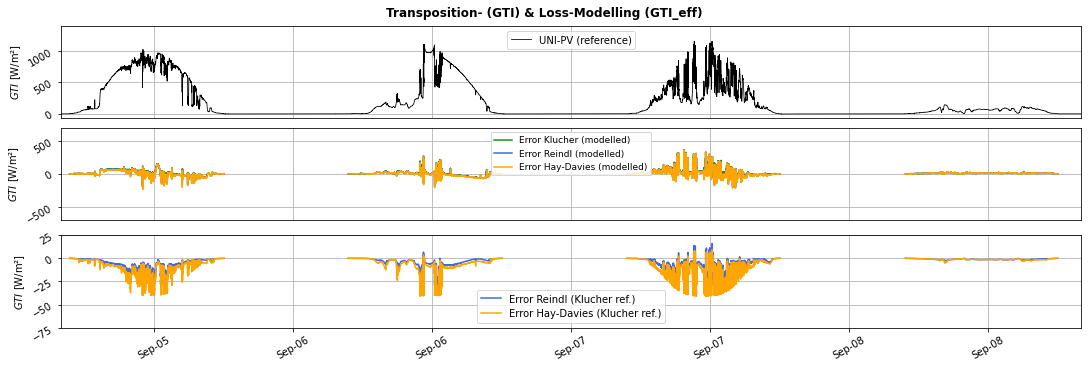

In [43]:
fig, axs = plt.subplots(3,figsize=(15,5), sharex=True, constrained_layout=True)
fig.suptitle('Transposition- (GTI) & Loss-Modelling (GTI_eff)',fontweight='bold')
axs[0].tick_params(labelrotation=30)
axs[1].tick_params(labelrotation=30)
axs[2].tick_params(labelrotation=30)
axs[0].grid()
axs[1].grid()
axs[2].grid()
# Overview Plot
axs[0].plot(GTI_eff_unipv,label='UNI-PV (reference)',color='black',linewidth=0.8)
# Differnt Models Plot
axs[1].plot(GTI_th_klucher_eff - GTI_eff_unipv,label='Error Klucher (modelled)',color='forestgreen')
axs[1].plot(GTI_th_reindl_eff - GTI_eff_unipv,label='Error Reindl (modelled)',color='royalblue')
axs[1].plot(GTI_th_haydavies_eff - GTI_eff_unipv,label='Error Hay-Davies (modelled)',color='orange')
# klucher vs others
axs[2].plot(GTI_th_reindl_eff - GTI_th_klucher_eff,label='Error Reindl (Klucher ref.)',color='royalblue')
axs[2].plot(GTI_th_haydavies_eff - GTI_th_klucher_eff,label='Error Hay-Davies (Klucher ref.)',color='orange')

axs[0].tick_params(axis='x', which='both',bottom=False) # turn off major & minor ticks on the bottom
axs[1].tick_params(axis='x', which='both',bottom=False) # turn off major & minor ticks on the bottom
axs[0].legend(loc="upper center")
axs[1].legend(loc="upper center",fontsize=9)
axs[2].legend(loc="lower center",fontsize=10)

axs[0].set_xlim(np.datetime64('2022-09-05T04:00:00'), np.datetime64('2022-09-08T20:00:00'))
axs[1].set_xlim(np.datetime64('2022-09-05T04:00:00'), np.datetime64('2022-09-08T20:00:00'))
axs[1].set_ylim(-700,700)
axs[2].set_ylim(-75,25)
dtFmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(dtFmt) 
axs[0].set_ylabel(r'$GTI ~\mathrm{[W/m²]}$')
axs[1].set_ylabel(r'$GTI ~\mathrm{[W/m²]}$')
axs[2].set_ylabel(r'$GTI ~\mathrm{[W/m²]}$')
#plt.savefig('5_diff_transp.png')
plt.show()

#### 5.2 Power Output

In [44]:
# umrechnung in kWh
#mean_energy_unipv = np.sum(unipv_P)/3600000 
#mean_energy_klucher = np.sum(model_P)/3600000 
#mean_energy_reindl = np.sum(model_P_reindl)/3600000 
#mean_energy_haydavies= np.sum(model_P_haydavies)/3600000 

In [45]:
#print('mean_energy_unipv:',mean_energy_unipv)
#print('mean_energy_klucher:',mean_energy_klucher)
#print('mean_energy_reindl:',mean_energy_reindl)
#print('mean_energy_haydavies:',mean_energy_haydavies)

In [46]:
#error_metrics(model_P,unipv_P,'klucher')
#error_metrics(model_P_reindl,unipv_P,'reindl')
#error_metrics(model_P_haydavies,unipv_P,'haydavies')

####  Maximum Power Output from clearsky

In [47]:
## Model clearsky (max power) with ineichen
linke_turbidity = pvlib.clearsky.lookup_linke_turbidity(df.index, lat, lon, filepath=None, interp_turbidity=True)
CS_ineichen = pvlib.clearsky.ineichen(solpos['apparent_zenith'], AM_abs, linke_turbidity, altitude=15, dni_extra=1364.0, perez_enhancement=False)
CS_ineichen.keys()

Index(['ghi', 'dni', 'dhi'], dtype='object')

In [48]:
GHI_CS_ineichen = CS_ineichen['ghi']
DNI_CS_ineichen = CS_ineichen['dni']
DHI_CS_ineichen = CS_ineichen['dhi']

C:\Users\Andre\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


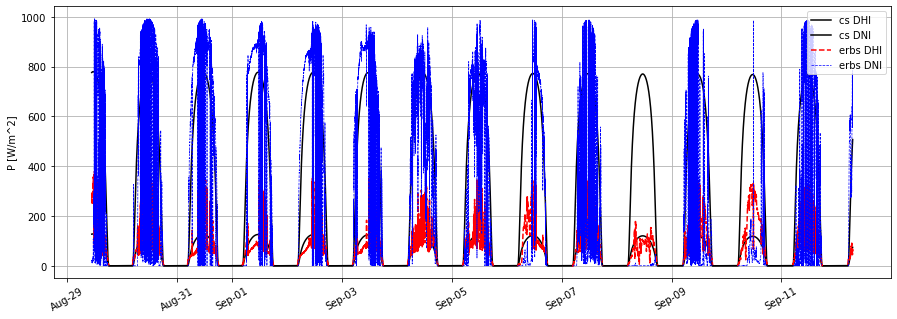

In [49]:
plt.figure(figsize=(15,5))
plt.title('')
plt.plot(DHI_CS_ineichen,label='cs DHI',color = 'black')
plt.plot(DNI_CS_ineichen,label='cs DNI',color = 'black')

plt.plot(DHI_th_dirint,label='erbs DHI',color='red',linestyle = '--')
plt.plot(DNI_th_dirint,label='erbs DNI',color='blue',linestyle = '--',linewidth=0.7)
plt.xticks(rotation=30)
plt.grid()
plt.legend()
#plt.xlim(np.datetime64('2022-09-01T04:00:00'), np.datetime64('2022-05-12T20:00:00'))
dtFmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(dtFmt) 
plt.ylabel('P [W/m^2]')
#plt.savefig('5_GTI_eff_transpo_model_comp.png')
plt.show()

In [50]:
GTI_ineichen_klucher = pvlib.irradiance.get_total_irradiance(PV_tilt, PV_azimuth, solpos['apparent_zenith'], solpos['azimuth'], 
                                                             DNI_CS_ineichen, GHI_CS_ineichen, DHI_CS_ineichen,
                                                             model='klucher',dni_extra=dni_extra)
GTI_ineichen_klucher.keys()

Index(['poa_global', 'poa_direct', 'poa_diffuse', 'poa_sky_diffuse',
       'poa_ground_diffuse'],
      dtype='object')

In [51]:
GTI_CS_klucher_global = GTI_ineichen_klucher['poa_global']
GTI_CS_klucher_diffuse = GTI_ineichen_klucher['poa_diffuse']
GTI_CS_klucher_direct = GTI_ineichen_klucher['poa_direct']

In [52]:
GTI_eff_CS_klucher = pvlib.pvsystem.sapm_effective_irradiance(GTI_CS_klucher_direct, GTI_CS_klucher_diffuse, AM_abs, aoi, module)

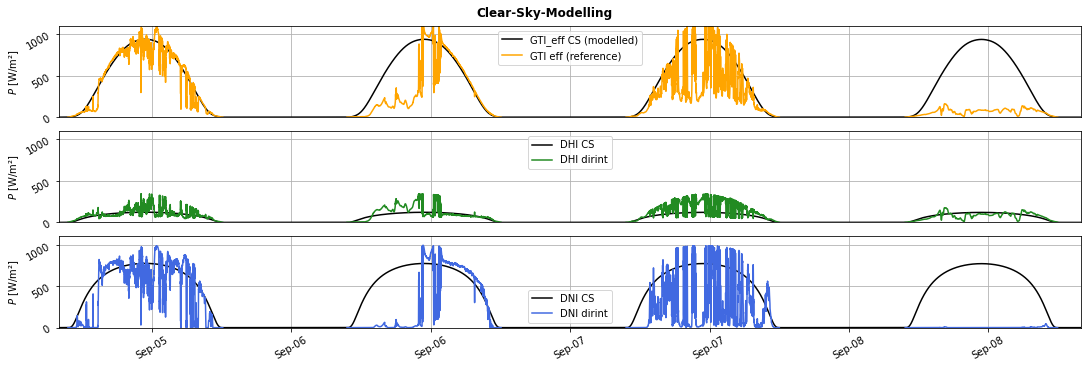

In [53]:
fig, axs = plt.subplots(3,figsize=(15,5), sharex=True, constrained_layout=True)
fig.suptitle('Clear-Sky-Modelling',fontweight='bold')
axs[0].tick_params(labelrotation=30)
axs[1].tick_params(labelrotation=30)
axs[2].tick_params(labelrotation=30)
axs[0].grid()
axs[1].grid()
axs[2].grid()
# Overview Plot
axs[0].plot(GTI_eff_CS_klucher,label='GTI_eff CS (modelled)',color='black')
axs[0].plot(GTI_th_klucher_eff,label='GTI eff (reference)',color='orange')
# Differnt Models Plot
axs[1].plot(DHI_CS_ineichen,label='DHI CS',color='black')
axs[1].plot(DHI_th_dirint,label='DHI dirint',color='forestgreen')
# klucher vs others
axs[2].plot(DNI_CS_ineichen,label='DNI CS',color='black')
axs[2].plot(DNI_th_dirint,label='DNI dirint',color='royalblue')

axs[0].tick_params(axis='x', which='both',bottom=False) # turn off major & minor ticks on the bottom
axs[1].tick_params(axis='x', which='both',bottom=False) # turn off major & minor ticks on the bottom
axs[0].legend(loc="upper center")
axs[1].legend(loc="upper center")
axs[2].legend(loc="lower center")

axs[0].set_xlim(np.datetime64('2022-09-05T04:00:00'), np.datetime64('2022-09-08T20:00:00'))
axs[1].set_xlim(np.datetime64('2022-09-05T04:00:00'), np.datetime64('2022-09-08T20:00:00'))
axs[0].set_ylim(0,1100)
axs[1].set_ylim(0,1100)
axs[2].set_ylim(0,1100)
dtFmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(dtFmt) 
axs[0].set_ylabel(r'$P~\mathrm{[W/m²]}$')
axs[1].set_ylabel(r'$P~\mathrm{[W/m²]}$')
axs[2].set_ylabel(r'$P~\mathrm{[W/m²]}$')
#plt.savefig('6_CS.png')
plt.show()

In [55]:
mean_energy_max = np.sum(GTI_eff_CS_klucher)/3600000
print('mean_energy_unipv:',mean_energy_unipv)
print('mean_energy_max (CS):',mean_energy_max)
print('mean_energy_klucher:',mean_energy_klucher)
print('mean_energy_reindl:',mean_energy_reindl)
print('mean_energy_haydavies:',mean_energy_haydavies)

NameError: name 'mean_energy_unipv' is not defined

## 7. Clearsky Index, compare pv output with clear/overcast and broken cloud conditions

In [56]:
CS_index = pvlib.irradiance.clearsky_index(GHI_ph_mes, GHI_CS_ineichen, max_clearsky_index=1.3)

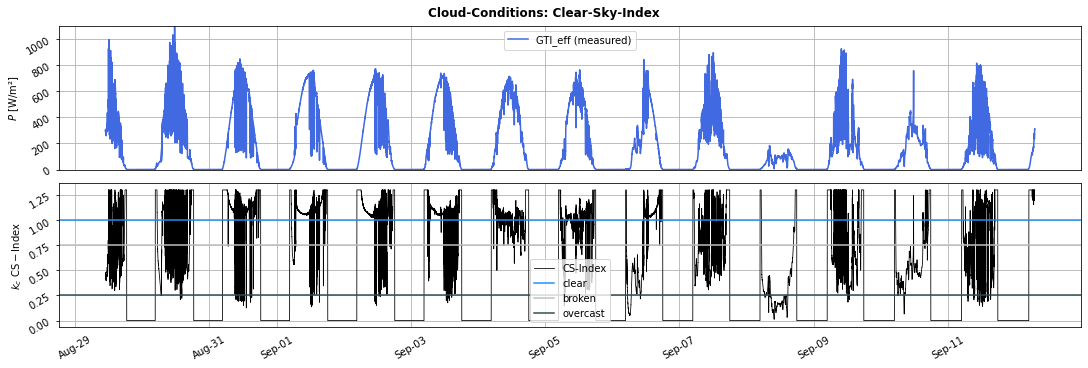

In [57]:
fig, axs = plt.subplots(2,figsize=(15,5), sharex=True, constrained_layout=True)
fig.suptitle('Cloud-Conditions: Clear-Sky-Index',fontweight='bold')
axs[0].tick_params(labelrotation=30)
axs[1].tick_params(labelrotation=30)
#axs[2].tick_params(labelrotation=30)
axs[0].grid()
axs[1].grid()
#axs[2].grid()
# Overview Plot
axs[0].plot(GHI_th_mes,label='GTI_eff (measured)',color='royalblue')
# Differnt Models Plot
axs[1].plot(CS_index,label='CS-Index',color='black',linewidth=0.8)
axs[1].axhline(y = 1, color = 'dodgerblue', linestyle = '-', label='clear')
axs[1].axhline(y = 0.75, color = 'silver', linestyle = '-', label='broken')
axs[1].axhline(y = 0.25, color = 'darkslategray', linestyle = '-', label='overcast')

axs[0].tick_params(axis='x', which='both',bottom=False) # turn off major & minor ticks on the bottom
axs[1].tick_params(axis='x', which='both',bottom=False) # turn off major & minor ticks on the bottom
axs[0].legend(loc="upper center")
axs[1].legend(loc="lower center")
#axs[2].legend(loc="lower center")

#axs[0].set_xlim(np.datetime64('2022-09-05T04:00:00'), np.datetime64('2022-09-08T20:00:00'))
#axs[1].set_xlim(np.datetime64('2022-09-05T04:00:00'), np.datetime64('2022-09-08T20:00:00'))
axs[0].set_ylim(0,1100)
#axs[1].set_ylim(0,1100)
dtFmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(dtFmt) 
axs[0].set_ylabel(r'$P~\mathrm{[W/m²]}$')
axs[1].set_ylabel(r'$k_c~\mathrm{CS-Index}$')
#axs[2].set_ylabel(r'$P~\mathrm{[W/m²]}$')
#plt.savefig('6_CS_full.png')
plt.show()

In [58]:
df4 = df3
df4

,GTI_eff_unipv,mpp(1),mpp(2),Temp(1),Temp(2),Temp(3)
Datetime,,,,,,
2022-08-29 10:50:01,210.1,28.96,0.897,23.85,24.1,30.51
2022-08-29 10:50:02,210.1,28.93,0.897,24.01,24.38,30.51
2022-08-29 10:50:03,210.1,28.96,0.897,23.77,24.26,30.55
2022-08-29 10:50:04,210.1,28.93,0.897,23.45,24.45,30.51
2022-08-29 10:50:05,210.1,28.91,0.897,23.25,24.18,30.55
...,...,...,...,...,...,...
2022-09-12 07:05:13,320.5,30.38,1.218,18.57,19.34,23.05
2022-09-12 07:05:14,319.7,30.35,1.218,18.45,19.3,23.13
2022-09-12 07:05:15,319.7,30.35,1.216,18.49,18.86,23.08


In [59]:
#df['2022-08-29 10:50:01':'2022-09-12 07:05:20']

mask_clear= (df4.index > '2022-9-1') & (df4.index <= '2022-9-6')
mask_overcast = ((df4.index > '2022-9-8') & (df4.index <= '2022-9-9')
                + (df4.index > '2022-9-10') & (df4.index <= '2022-9-11'))
mask_broken = ((df4.index > '2022-8-29 11:00:00') & (df4.index <= '2022-9-1')
                + (df4.index > '2022-9-7') & (df4.index <= '2022-9-8')
                + (df4.index > '2022-9-9') & (df4.index <= '2022-9-10')
                + (df4.index > '2022-9-11') & (df4.index <= '2022-9-12'))

In [60]:
clear = df4.loc[mask_clear]
broken = df4.loc[mask_broken]
overcast = df4.loc[mask_overcast]

In [61]:
print('clear:',clear.size/3600,'h')
print('broken:',broken.shape[0]/3600,'h')
print('overcast:',overcast.shape[0]/3600,'h')

clear: 720.0 h
broken: 133.00083333333333 h
overcast: 48.0 h


In [62]:
mean_energy_max_clear = np.sum(GTI_eff_CS_klucher.loc[mask_clear])/3600000
mean_energy_max_broken = np.sum(GTI_eff_CS_klucher.loc[mask_broken])/3600000
mean_energy_max_overcast = np.sum(GTI_eff_CS_klucher.loc[mask_overcast])/3600000

mean_energy_klucher_clear = np.sum(GTI_th_klucher_eff.loc[mask_clear])/3600000
mean_energy_klucher_broken = np.sum(GTI_th_klucher_eff.loc[mask_broken])/3600000
mean_energy_klucher_overcast = np.sum(GTI_th_klucher_eff.loc[mask_overcast])/3600000

In [63]:
print('Max Clear:',mean_energy_max_clear, 'Modelled clear:',mean_energy_klucher_clear, (mean_energy_klucher_clear*100)/mean_energy_max_clear)
print('Max Broken:',mean_energy_max_broken, 'Modelled Broken:',mean_energy_klucher_broken, (mean_energy_klucher_broken*100)/mean_energy_max_broken)
print('Max Overcast:',mean_energy_max_overcast, 'Modelled Overcast:',mean_energy_klucher_overcast, (mean_energy_klucher_overcast*100)/mean_energy_max_overcast)

Max Clear: 33.5752902011203 Modelled clear: 33.70926276415308 100.39902131070279
Max Broken: 37.16741320265245 Modelled Broken: 27.399396393286413 73.71886831050985
Max Overcast: 13.185623173969747 Modelled Overcast: 3.1420082172074473 23.82904604319505


# 4 VGL POWER (MODEL VS MES)

In [64]:
global_POA = GTI_th_klucher_global.astype(np.float64)
global_POA_reindl = GTI_th_reindl_global.astype(np.float64)
global_POA_haydavies = GTI_th_haydavies_global.astype(np.float64)
global_POA_CS = GHI_CS_ineichen.astype(np.float64)

T_air = df['T_amb'].astype(np.float64)
W_speed = df['W_speed'].astype(np.float64)

global_POA_effective_reindl = GTI_th_reindl_eff.astype(np.float64)
global_POA_effective_haydavies = GTI_th_haydavies_eff.astype(np.float64)
global_POA_effective = GTI_th_klucher_eff.astype(np.float64)
global_POA_effective_CS = GTI_eff_CS_klucher.astype(np.float64)

Irradiance data pro qm fast gleich, P = U*I jedoch stark abweichend -> unipv anlage area viel kleiner


(19240.166666666668, 19243.833333333332)

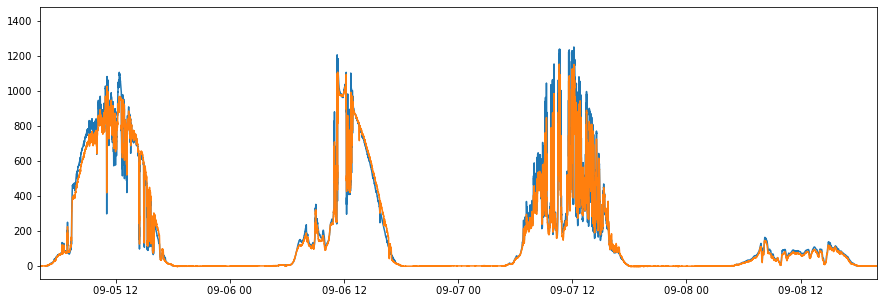

In [65]:
print('Irradiance data pro qm fast gleich, P = U*I jedoch stark abweichend -> unipv anlage area viel kleiner')
plt.figure(figsize=(15,5))
plt.plot(global_POA_effective)
plt.plot(GTI_eff_unipv)
plt.xlim(np.datetime64('2022-09-05T04:00:00'), np.datetime64('2022-09-08T20:00:00'))

In [66]:
T_cell = pvlib.temperature.sapm_cell(global_POA, T_air, W_speed, a=-3.49, b = -0.087, deltaT=3, irrad_ref=1000.0)
T_cell_reindl = pvlib.temperature.sapm_cell(global_POA_reindl, T_air, W_speed, a=-3.49, b = -0.087, deltaT=3, irrad_ref=1000.0)
T_cell_haydavies = pvlib.temperature.sapm_cell(global_POA_haydavies, T_air, W_speed, a=-3.49, b = -0.087, deltaT=3, irrad_ref=1000.0)
T_cell_CS = pvlib.temperature.sapm_cell(global_POA_CS, T_air, W_speed, a=-3.49, b = -0.087, deltaT=3, irrad_ref=1000.0)

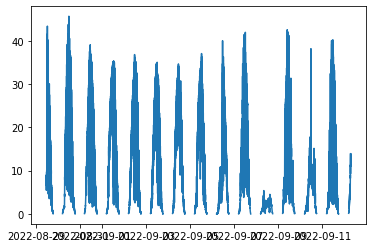

In [67]:
plt.plot(T_cell-T_air)

In [68]:
#load sam data from 'https://github.com/NREL/SAM/blob/develop/deploy/libraries/Sandia%20Modules.csv' in dict (load does not work unfortunately)
#werte müssten zu hoch sein
module2 = {'Area': 1.26,'Material': 'c-Si','Cells_in_Series': 72,'Parallel Strings': 1,
          'Isco': 5.4,'Voco': 44,'Impo': 4.9,'Vmpo': 35.7,'Aisc': 0.00065,'Aimp': -0.0002,
          'C0':0.996,'C1': 0.004,'C2':0.4064,'C3': -3.982,'C4':0.991,'C5': 0.009,'C6':1.097,'C7':-0.097,
          'Bvoco': -0.16,'Mbvoc': 0,'Bvmpo': -0.164,'Mbvmp': 0,'N':1.24,
          'A0':0.9439,'A1': 0.052256,'A2': -0.011388,'A3': 0.00086866,'A4':-0.000022491,
          'B0':1,'B1':-0.002438,'B2':0.0003103,'B3':-0.00001246,'B4':2.11E-07,'B5':-1.36E-09,
          'dT':3,'FD': 1,'a': -3.49,'b': -0.087,
          'IXO': 5.33,'IXXO': 3.46}

In [69]:
power_module = pvlib.pvsystem.sapm(global_POA_effective, T_cell, module2)
power_module_reindl = pvlib.pvsystem.sapm(global_POA_effective_reindl, T_cell_reindl, module2)
power_module_haydavies = pvlib.pvsystem.sapm(global_POA_effective_haydavies, T_cell_haydavies, module2)
power_module_CS = pvlib.pvsystem.sapm(global_POA_effective_CS, T_cell_haydavies, module2)

In [70]:
model_Isc = power_module['i_sc']
model_Voc = power_module['v_oc']
model_P = model_Isc * model_Voc * 0.5

model_Isc_reindl = power_module_reindl['i_sc']
model_Voc_reindl = power_module_reindl['v_oc']
model_P_reindl = model_Isc_reindl * model_Voc_reindl * 0.5

model_Isc_haydavies= power_module_haydavies['i_sc']
model_Voc_haydavies = power_module_haydavies['v_oc']
model_P_haydavies = model_Isc_haydavies * model_Voc_haydavies * 0.5

model_Isc_CS= power_module_CS['i_sc']
model_Voc_CS = power_module_CS['v_oc']
model_P_CS = model_Isc_CS * model_Voc_CS * 0.5

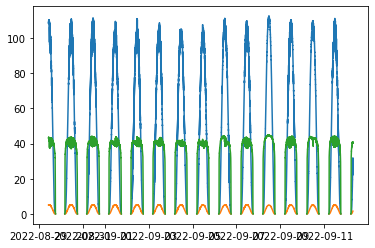

In [71]:
plt.plot(model_P_CS)
plt.plot(model_Isc_CS)
plt.plot(model_Voc_CS)

In [72]:
unipv_Voc = df3['mpp(1)'].astype(np.float64)
unipv_Isc = df3['mpp(2)'].astype(np.float64)
unipv_P = unipv_Voc * unipv_Isc

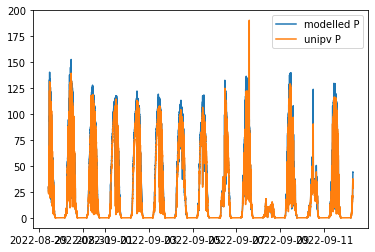

In [73]:
plt.plot(model_P, label = 'modelled P')
plt.plot(unipv_P, label = 'unipv P')
plt.legend()

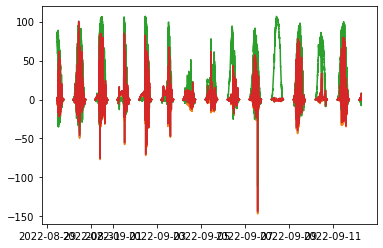

In [74]:
model_P_klucher_err = model_P - unipv_P
model_P_reindl_err = model_P_reindl - unipv_P
model_P_haydavies_err = model_P_haydavies - unipv_P
model_P_CS_err = model_P_CS - unipv_P

plt.plot(model_P_reindl_err)
plt.plot(model_P_haydavies_err)
plt.plot(model_P_CS_err)
plt.plot(model_P_klucher_err)

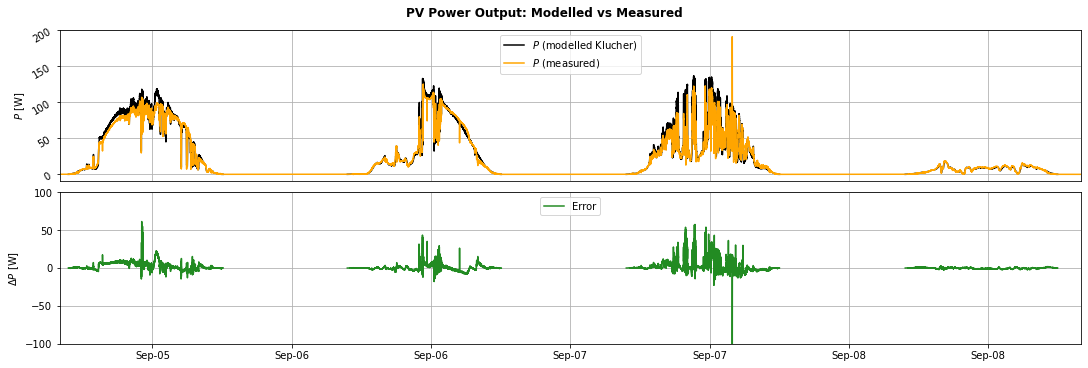

In [75]:
fig, axs = plt.subplots(2,figsize=(15,5), sharex=True, constrained_layout=True)
fig.suptitle('PV Power Output: Modelled vs Measured',fontweight='bold')
axs[0].tick_params(labelrotation=30)
axs[0].grid()
axs[1].grid()
# Overview Plot
axs[0].plot(model_P,label=r'$P$ (modelled Klucher)',color='black')
axs[0].plot(unipv_P,label=r'$P$ (measured)',color='orange')
axs[1].plot(model_P_klucher_err,label=r'Error',color='forestgreen')
axs[0].tick_params(axis='x', which='both',bottom=False) # turn off major & minor ticks on the bottom
axs[0].legend(loc="upper center")
axs[1].legend(loc="upper center")
axs[0].set_xlim(np.datetime64('2022-09-05T04:00:00'), np.datetime64('2022-09-08T20:00:00'))
axs[1].set_xlim(np.datetime64('2022-09-05T04:00:00'), np.datetime64('2022-09-08T20:00:00'))
axs[1].set_ylim([-100,100])
dtFmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(dtFmt) 
axs[0].set_ylabel(r'$P~\mathrm{[W]}$')
axs[1].set_ylabel(r'$\Delta P~\mathrm{[W]}$')
#plt.savefig('new_4_PV_power_output.png')
plt.show()

In [76]:
error_metrics(model_P,unipv_P,'error pv power output')

error pv power output :
MBE=2.10
RMSE=7.06
MAE=4.05


In [77]:
# FRAGE 5
print(r'Uni_PV PV Output: E = {:.2f}'.format(np.sum(unipv_P)/3600000),'kWh')
print(r'Klucher PV Output E = {:.2f}'.format(np.sum(model_P)/3600000),'kWh')
print(r'Reindl PV Output E = {:.2f}'.format(np.sum(model_P_reindl)/3600000),'kWh')
print(r'Hay_davies PV Output E = {:.2f}'.format(np.sum(model_P_haydavies)/3600000),'kWh')

Uni_PV PV Output: E = 7.13 kWh
Klucher PV Output E = 7.51 kWh
Reindl PV Output E = 7.42 kWh
Hay_davies PV Output E = 7.37 kWh


In [78]:
# Frage 6
print(r'Uni_PV PV Output: E = {:.2f}'.format(np.sum(unipv_P)/3600000),'kWh')
print(r'Clear-Sky PV Output: E = {:.2f}'.format(np.sum(model_P_CS)/3600000),'kWh')

Uni_PV PV Output: E = 7.13 kWh
Clear-Sky PV Output: E = 10.18 kWh


## 7 CS pv output

In [79]:
sum_time = (clear.shape[0]/3600)+(broken.shape[0]/3600)+(overcast.shape[0]/3600)
print('clear:',np.round(clear.shape[0]/3600,2),'h',np.round((clear.shape[0]/36)/sum_time,2),'%')
print('broken:',np.round(broken.shape[0]/3600,2),'h',np.round((broken.shape[0]/36)/sum_time,2),'%')
print('overcast:',np.round(overcast.shape[0]/3600,2),'h',np.round((overcast.shape[0]/36)/sum_time,2),'%')

clear: 120.0 h 39.87 %
broken: 133.0 h 44.19 %
overcast: 48.0 h 15.95 %


In [80]:
mean_energy_max_clear = np.sum(model_P_CS.loc[mask_clear])/3600000
mean_energy_max_broken = np.sum(model_P_CS.loc[mask_broken])/3600000
mean_energy_max_overcast = np.sum(model_P_CS.loc[mask_overcast])/3600000

mean_energy_klucher_clear = np.sum(model_P.loc[mask_clear])/3600000
mean_energy_klucher_broken = np.sum(model_P.loc[mask_broken])/3600000
mean_energy_klucher_overcast = np.sum(model_P.loc[mask_overcast])/3600000

mean_energy_unipv_clear = np.sum(unipv_P.loc[mask_clear])/3600000
mean_energy_unipv_broken = np.sum(unipv_P.loc[mask_broken])/3600000
mean_energy_unipv_overcast = np.sum(unipv_P.loc[mask_overcast])/3600000

print('Max Clear:',np.round(mean_energy_max_clear,2),'kWh', 'Modelled clear:',np.round(mean_energy_klucher_clear,2),'kWh', np.round((mean_energy_klucher_clear*100)/mean_energy_max_clear,2),'%')
print('Max Broken:',np.round(mean_energy_max_broken,2),'kWh', 'Modelled Broken:',np.round(mean_energy_klucher_broken,2),'kWh', np.round((mean_energy_klucher_broken*100)/mean_energy_max_broken,2),'%')
print('Max Overcast:',np.round(mean_energy_max_overcast,2),'kWh', 'Modelled Overcast:',np.round(mean_energy_klucher_overcast,2),'kWh', np.round((mean_energy_klucher_overcast*100)/mean_energy_max_overcast,2),'%')

error_metrics(mean_energy_klucher_clear , mean_energy_unipv_clear, 'PV Output modelled vs measured')

Max Clear: 3.68 kWh Modelled clear: 3.69 kWh 100.24 %
Max Broken: 4.17 kWh Modelled Broken: 2.99 kWh 71.74 %
Max Overcast: 1.54 kWh Modelled Overcast: 0.34 kWh 21.94 %
PV Output modelled vs measured :
MBE=0.21
RMSE=0.21
MAE=0.21


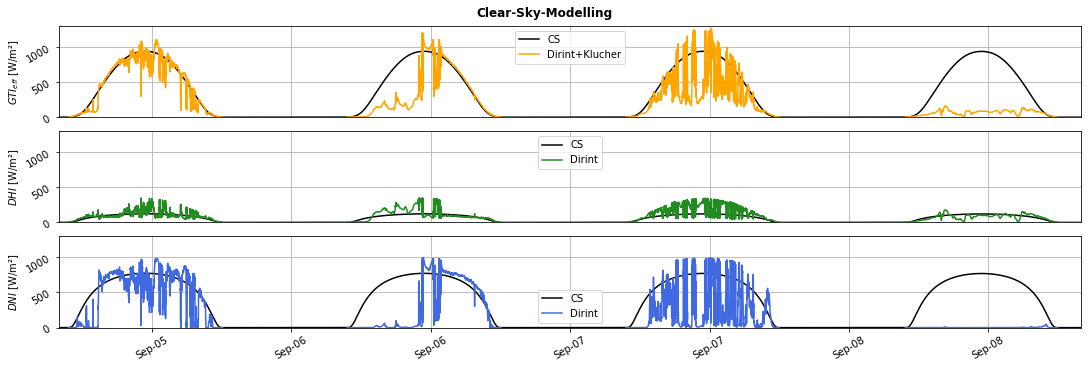

In [81]:
fig, axs = plt.subplots(3,figsize=(15,5), sharex=True, constrained_layout=True)
fig.suptitle('Clear-Sky-Modelling',fontweight='bold')
axs[0].tick_params(labelrotation=30)
axs[1].tick_params(labelrotation=30)
axs[2].tick_params(labelrotation=30)
axs[0].grid()
axs[1].grid()
axs[2].grid()
# Overview Plot
#GTI_eff_CS_klucher,label='GTI_eff CS (modelled)',color='black')
#axs[0].plot(GTI_th_klucher_eff

axs[0].plot(GTI_eff_CS_klucher,label='CS',color='black')
axs[0].plot(GTI_th_klucher_eff,label='Dirint+Klucher',color='orange')
# Differnt Models Plot
axs[1].plot(DHI_CS_ineichen,label='CS',color='black')
axs[1].plot(DHI_th_dirint,label='Dirint',color='forestgreen')
# klucher vs others
axs[2].plot(DNI_CS_ineichen,label='CS',color='black')
axs[2].plot(DNI_th_dirint,label='Dirint',color='royalblue')

axs[0].tick_params(axis='x', which='both',bottom=False) # turn off major & minor ticks on the bottom
axs[1].tick_params(axis='x', which='both',bottom=False) # turn off major & minor ticks on the bottom
axs[0].legend(loc="upper center")
axs[1].legend(loc="upper center")
axs[2].legend(loc="lower center")

axs[0].set_xlim(np.datetime64('2022-09-05T04:00:00'), np.datetime64('2022-09-08T20:00:00'))
axs[1].set_xlim(np.datetime64('2022-09-05T04:00:00'), np.datetime64('2022-09-08T20:00:00'))
axs[0].set_ylim(0,1300)
axs[1].set_ylim(0,1300)
axs[2].set_ylim(0,1300)
dtFmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(dtFmt) 
axs[0].set_ylabel(r'$GTI_{eff}~\mathrm{[W/m²]}$')
axs[1].set_ylabel(r'$DHI~\mathrm{[W/m²]}$')
axs[2].set_ylabel(r'$DNI~\mathrm{[W/m²]}$')
plt.savefig('new_6_CS_split.png')
plt.show()

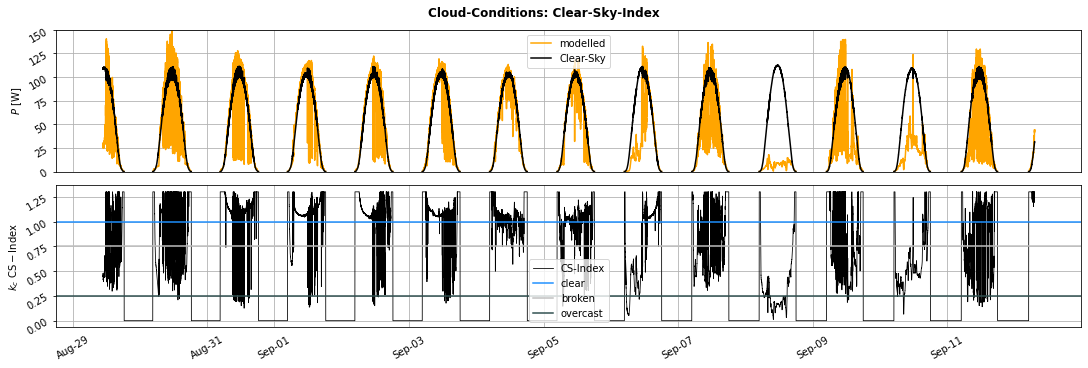

In [82]:
fig, axs = plt.subplots(2,figsize=(15,5), sharex=True, constrained_layout=True)
fig.suptitle('Cloud-Conditions: Clear-Sky-Index',fontweight='bold')
axs[0].tick_params(labelrotation=30)
axs[1].tick_params(labelrotation=30)
#axs[2].tick_params(labelrotation=30)
axs[0].grid()
axs[1].grid()
#axs[2].grid()
# Overview Plot
axs[0].plot(model_P,label='modelled',color='orange')
axs[0].plot(model_P_CS,label='Clear-Sky',color='black')
# Differnt Models Plot
axs[1].plot(CS_index,label='CS-Index',color='black',linewidth=0.8)
axs[1].axhline(y = 1, color = 'dodgerblue', linestyle = '-', label='clear')
axs[1].axhline(y = 0.75, color = 'silver', linestyle = '-', label='broken')
axs[1].axhline(y = 0.25, color = 'darkslategray', linestyle = '-', label='overcast')

axs[0].tick_params(axis='x', which='both',bottom=False) # turn off major & minor ticks on the bottom
axs[1].tick_params(axis='x', which='both',bottom=False) # turn off major & minor ticks on the bottom
axs[0].legend(loc="upper center")
axs[1].legend(loc="lower center")
#axs[2].legend(loc="lower center")

#axs[0].set_xlim(np.datetime64('2022-09-05T04:00:00'), np.datetime64('2022-09-08T20:00:00'))
#axs[1].set_xlim(np.datetime64('2022-09-05T04:00:00'), np.datetime64('2022-09-08T20:00:00'))
axs[0].set_ylim(0,150)
#axs[1].set_ylim(0,1100)
dtFmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(dtFmt) 
axs[0].set_ylabel(r'$P~\mathrm{[W]}$')
axs[1].set_ylabel(r'$k_c~\mathrm{CS-Index}$')
#axs[2].set_ylabel(r'$P~\mathrm{[W/m²]}$')
plt.savefig('new_6_7_CS_complete.png')
plt.show()

## für frage 8 anfang

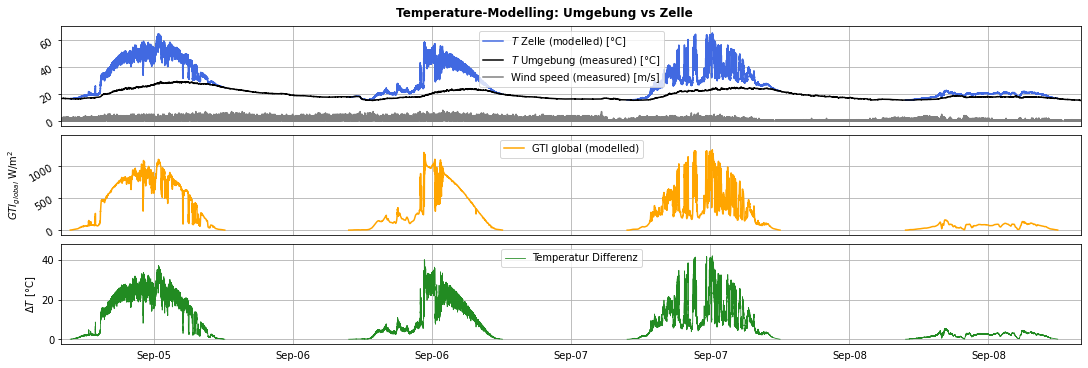

In [83]:
fig, axs = plt.subplots(3,figsize=(15,5), sharex=True, constrained_layout=True)
fig.suptitle('Temperature-Modelling: Umgebung vs Zelle',fontweight='bold')
axs[0].tick_params(labelrotation=30)
axs[1].tick_params(labelrotation=30)
axs[0].grid()
axs[1].grid()
axs[2].grid()
# Overview Plot
axs[0].plot(T_cell,label=r'$T$ Zelle (modelled) [°C]',color='royalblue')
axs[0].plot(T_air,label=r'$T$ Umgebung (measured) [°C]',color='black')
axs[0].plot(W_speed,label='Wind speed (measured) [m/s]',color='grey')
axs[1].plot(GTI_th_klucher_global,label='GTI global (modelled)',color='orange')
# Differnt Models Plot
axs[2].plot(T_cell-T_air,label=r'Temperatur Differenz',color='forestgreen',linewidth=0.8)
axs[0].tick_params(axis='x', which='both',bottom=False) # turn off major & minor ticks on the bottom
axs[1].tick_params(axis='x', which='both',bottom=False) # turn off major & minor ticks on the bottom
axs[2].tick_params(axis='x', which='both',bottom=False) # turn off major & minor ticks on the bottom
axs[0].legend(loc="upper center")
axs[1].legend(loc="upper center")
axs[2].legend(loc="upper center")
axs[0].set_xlim(np.datetime64('2022-09-05T04:00:00'), np.datetime64('2022-09-08T20:00:00'))
axs[1].set_xlim(np.datetime64('2022-09-05T04:00:00'), np.datetime64('2022-09-08T20:00:00'))
axs[2].set_xlim(np.datetime64('2022-09-05T04:00:00'), np.datetime64('2022-09-08T20:00:00'))
#axs[0].set_ylim(0,110)
#axs[1].set_ylim(0,1100)
dtFmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(dtFmt) 
axs[1].set_ylabel(r'$GTI_{global}~\mathrm{W/m^2}$')
axs[2].set_ylabel(r'$\Delta T~\mathrm{[°C]}$')
#plt.savefig('new_4_Temp.png')
plt.show()

## 8 Cell Temp PV Output Correlation

In [84]:
#T_cell = pvlib.temperature.sapm_cell(global_POA, T_air, W_speed, a=-3.49, b = -0.087, deltaT=3, irrad_ref=1000.0)

In [85]:
Ts = np.arange(-50,100,10)
T1 = []

for temp in Ts:
    Temps = pvlib.pvsystem.sapm(global_POA_effective, T_cell + temp, module2)
    Temps_power = Temps['i_sc'] * Temps['v_oc'] * 0.5
    E_Temps_power = np.nansum(Temps_power)/3600000
    T1 = np.append(T1,E_Temps_power)


In [86]:
Ts
#T_cell.mean()

array([-50, -40, -30, -20, -10,   0,  10,  20,  30,  40,  50,  60,  70,
        80,  90])

No handles with labels found to put in legend.


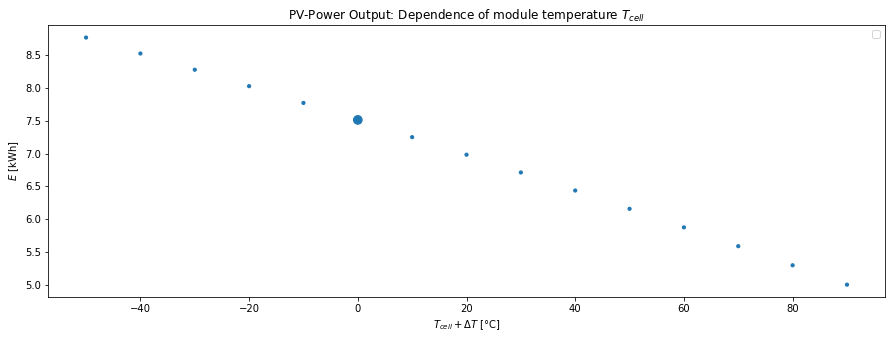

In [87]:
plt.figure(figsize=(15,5))
plt.title(r'PV-Power Output: Dependence of module temperature $T_{cell}$')
plt.scatter(Ts, T1,s=[10,10,10,10,10,75,10,10,10,10,10,10,10,10,10])
#plt.axhline(y = 7.51, color = 'orange', linestyle = '-', label = 'modelled')
#plt.axhline(y = 7.13, color = 'black', linestyle = '-', label = 'measured')
plt.ylabel(r'$E$ [kWh]')
plt.xlabel(r'$T_{cell} + \Delta T$ [°C]')
plt.savefig('8_temp.png')
plt.legend()

## 9 Ambient Temperature und PV Output corelation

In [88]:
Tairs = np.arange(-50,100,10)
T2 = []

for temp in Tairs:
    Temps2 = pvlib.temperature.sapm_cell(global_POA, T_air + temp, W_speed, a=-3.49, b = -0.087, deltaT=3, irrad_ref=1000.0)
    sapm2 = pvlib.pvsystem.sapm(global_POA_effective, Temps2, module2)
    power2 = sapm2['i_sc'] * sapm2['v_oc'] * 0.5
    E_Temps_power2 = np.nansum(power2)/3600000
    T2 = np.append(T2,E_Temps_power2)


#T_cell = pvlib.temperature.sapm_cell(global_POA, T_air, W_speed, a=-3.49, b = -0.087, deltaT=3, irrad_ref=1000.0)

No handles with labels found to put in legend.


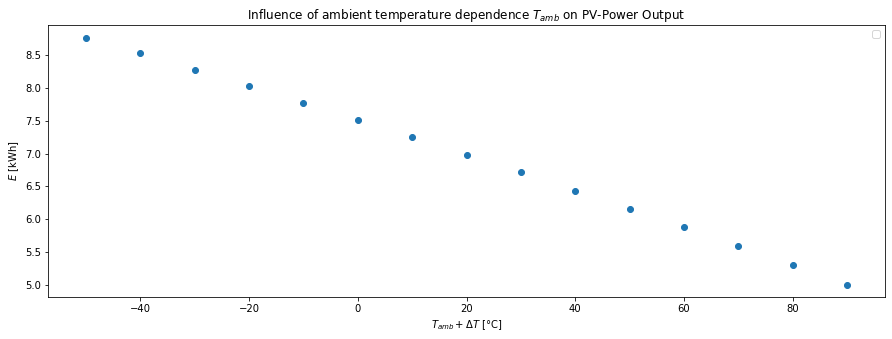

In [89]:
plt.figure(figsize=(15,5))
plt.title(r'Influence of ambient temperature dependence $T_{amb}$ on PV-Power Output')
plt.scatter(Tairs, T2)
#plt.axhline(y = 7.51, color = 'orange', linestyle = '-', label = 'modelled')
#plt.axhline(y = 7.13, color = 'black', linestyle = '-', label = 'measured')
plt.ylabel(r'$E$ [kWh]')
plt.xlabel(r'$T_{amb} + \Delta T$ [°C]')

plt.legend()

In [97]:
amb1 = df3['Temp(1)'].astype(np.float64)
amb2 = df3['Temp(2)'].astype(np.float64)
amb = (amb1 + amb2) /2
amb.to_numpy()

In [100]:
df4['ambs'] = amb

In [101]:
df4

,GTI_eff_unipv,mpp(1),mpp(2),Temp(1),Temp(2),Temp(3),ambs
Datetime,,,,,,,
2022-08-29 10:50:01,210.1,28.96,0.897,23.85,24.1,30.51,23.975
2022-08-29 10:50:02,210.1,28.93,0.897,24.01,24.38,30.51,24.195
2022-08-29 10:50:03,210.1,28.96,0.897,23.77,24.26,30.55,24.015
2022-08-29 10:50:04,210.1,28.93,0.897,23.45,24.45,30.51,23.950
2022-08-29 10:50:05,210.1,28.91,0.897,23.25,24.18,30.55,23.715
...,...,...,...,...,...,...,...
2022-09-12 07:05:13,320.5,30.38,1.218,18.57,19.34,23.05,18.955
2022-09-12 07:05:14,319.7,30.35,1.218,18.45,19.3,23.13,18.875
2022-09-12 07:05:15,319.7,30.35,1.216,18.49,18.86,23.08,18.675


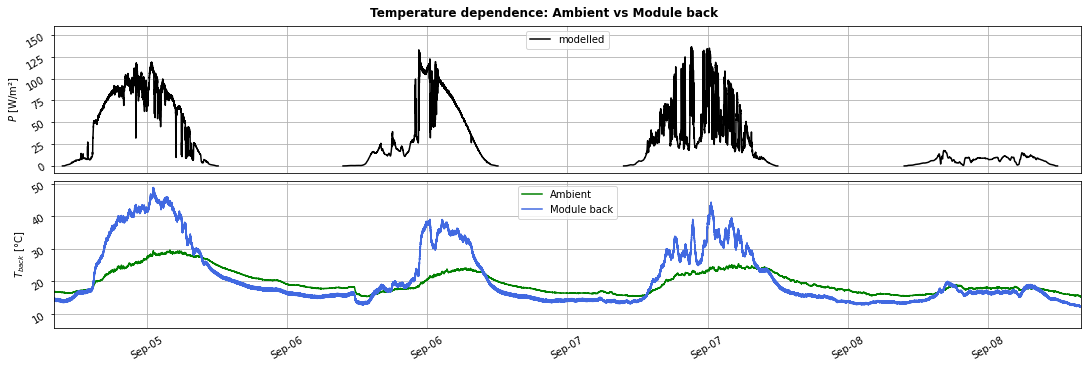

In [106]:
fig, axs = plt.subplots(2,figsize=(15,5), sharex=True, constrained_layout=True)
fig.suptitle('Temperature dependence: Ambient vs Module back',fontweight='bold')
axs[0].tick_params(labelrotation=30)
axs[1].tick_params(labelrotation=30)

axs[0].grid()
axs[1].grid()

# Overview Plot
axs[0].plot(model_P,label='modelled',color='black')
axs[1].plot(T_amb,label='Ambient',color='green')
axs[1].plot(df4['ambs'],label='Module back',color='royalblue')
# Error Plot
axs[0].tick_params(axis='x', which='both',bottom=False) # turn off major & minor ticks on the bottom
axs[1].tick_params(axis='x', which='both',bottom=False) # turn off major & minor ticks on the bottom
axs[0].legend(loc="upper center")
axs[1].legend(loc="upper center")

axs[0].set_xlim(np.datetime64('2022-09-05T04:00:00'), np.datetime64('2022-09-08T20:00:00'))
axs[1].set_xlim(np.datetime64('2022-09-05T04:00:00'), np.datetime64('2022-09-08T20:00:00'))


dtFmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(dtFmt) 
axs[0].set_ylabel(r'$P ~\mathrm{[W/m²]}$')
axs[1].set_ylabel(r'$T_{back} ~\mathrm{[°C]}$')

plt.savefig('9_temp.png')
plt.show()


In [93]:
amb2

NameError: name 'amb2' is not defined